# Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [34]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import brfss

import thinkstats2
import thinkplot

## Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [35]:
import first

live, firsts, others = first.MakeFrames()
type(live)
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,NaN,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,NaN,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


In [36]:
print(live.groupby(['agepreg'])['totalwgt_lb'].count())

agepreg
10.83    1
10.91    1
11.75    1
12.66    1
13.00    0
        ..
41.75    1
42.41    1
42.75    1
43.00    1
44.08    1
Name: totalwgt_lb, Length: 342, dtype: int64


In [37]:
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

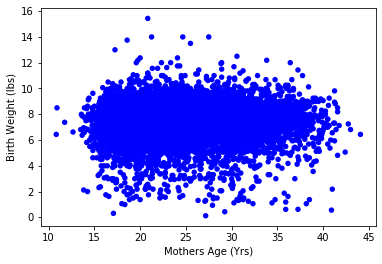

In [38]:
# Solution goes here for 
# Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. 
# Scatter plot of birth weight vs mother's age
thinkplot.Scatter(live.agepreg, live.totalwgt_lb, alpha=1)
thinkplot.Config(ylabel='Birth Weight (lbs)',
                 xlabel='Mother''s Age (Yrs)',
                 legend=False)

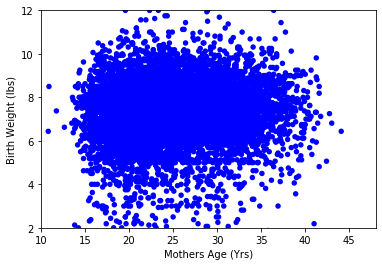

In [39]:
# Scatter plot of birth weight vs mother's age
# Chosing the birth weight between 4 lbs to 10lbs
# Chosing the Mother's Age between 20 Yrs to 40 Yrs
thinkplot.Scatter(live.agepreg,live.totalwgt_lb, alpha=1)
thinkplot.Config(ylabel='Birth Weight (lbs)',
                 xlabel='Mother''s Age (Yrs)',
                 axis=[10, 48, 2, 12],
                 legend=False)

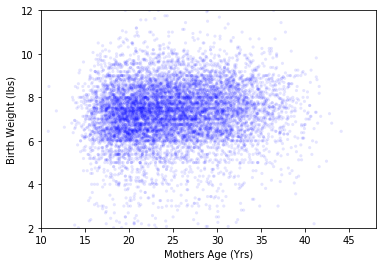

In [40]:
thinkplot.Scatter(live.agepreg,live.totalwgt_lb, alpha=0.1, s=10)
thinkplot.Config(ylabel='Birth Weight (lbs)',
                 xlabel='Mother''s Age (Yrs)',
                 axis=[10, 48, 2, 12],
                 legend=False)

In [41]:
# Solution goes here
# Plot percentiles of birth weight versus mother’s age.
# Dividing the dataset into groups by birth weight  
bins = np.arange(10, 48, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [42]:
# Showing the count of births by weight in each group of mother's age
for i, group in groups:
    print(i, len(group))

1 4
2 180
3 1169
4 1824
5 1695
6 1505
7 1223
8 830
9 402
10 170
11 34
12 2


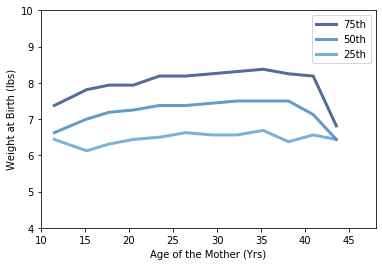

In [45]:
# Now we can compute the CDF of weight within each group.
# And then extract the 25th, 50th, and 75th percentile from each group.
mean_age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_age, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Age of the Mother (Yrs)',
                 ylabel='Weight at Birth (lbs)',
                 axis=[10, 48, 4, 10],
                 legend=True)

In [11]:
# Solution goes here
# Compute Pearson’s and Spearman’s correlations.
# A Pandas Series provides a method that computes correlations, and it offers spearman as one of the options.

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [12]:
SpearmanCorr(live.agepreg,live.totalwgt_lb)


0.09461004109658226

In [15]:
# NumPy provides a function that computes correlations
np.corrcoef(live.agepreg,live.totalwgt_lb)

array([[1.        , 0.06883397],
       [0.06883397, 1.        ]])

In [16]:
np.corrcoef(live.agepreg, np.log(live.totalwgt_lb))

array([[1.        , 0.04742255],
       [0.04742255, 1.        ]])

In [24]:
np.corrcoef(np.log(live.agepreg), live.totalwgt_lb)

array([[1.        , 0.07416024],
       [0.07416024, 1.        ]])

In [29]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [32]:
def PearsonCorr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [33]:
PearsonCorr(live.agepreg,live.totalwgt_lb)

0.06883397035410908

### How would you characterize the relationship between these variables?


1) The scatterplot shows a weak relationship between the variables.The scatter plot is pretty flat.
2) Now calculating the Pearsons Correlation shows a weak value of 0.07 also. The Spearman's is around 0.09
3) Both the values are low and hence shows the weak relationship between Age of Mother and the weight at birth.
4) The difference between the Pearson's Correlation and the Spearman's Correlation 
    suggests a) some influence of outliers.
             b) Non Liner relationship

5) Plotting percentiles of weight versus age suggests that the relationship is non-linear.  Birth weight increases more quickly in the range of mother's age from 15 to 35.  After that, the effect is weaker.